<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_STEM_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools nglview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


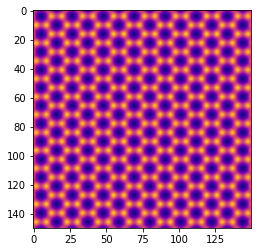

In [2]:

import matplotlib.pyplot as plt
import os, glob
from jarvis.analysis.stem.convolution_apprx import STEMConv
from jarvis.db.figshare import data, get_jid_data
import matplotlib.pyplot as plt
from jarvis.core.atoms import Atoms, ase_to_atoms, get_supercell_dims
from jarvis.core.lattice import get_2d_lattice
%matplotlib inline
#plt.switch_backend("agg")

#graphene
a = Atoms.from_dict(get_jid_data("JVASP-667")["atoms"])
p = STEMConv(atoms=a,output_size=[150,150]).simulate_surface(a)

plt.imshow(p[0], interpolation="gaussian", cmap="plasma")
# plt.savefig("stem_example.png")
# plt.close()

In [3]:
from jarvis.core.atoms import crop_square
import matplotlib.pyplot as plt
import os, glob
from jarvis.analysis.stem.convolution_apprx import STEMConv
from jarvis.db.figshare import data, get_jid_data
import matplotlib.pyplot as plt
from jarvis.core.atoms import Atoms, ase_to_atoms, get_supercell_dims
from jarvis.core.lattice import get_2d_lattice
from sklearn.model_selection import train_test_split
from collections import defaultdict
%matplotlib inline
#plt.switch_backend("agg")


a = Atoms.from_dict(get_jid_data("JVASP-667")["atoms"])

p = STEMConv(atoms=a,output_size=[150,150]).simulate_surface(a)

plt.imshow(p[0], interpolation="gaussian", cmap="plasma")
plt.savefig("stem_example.png")
plt.close()

Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


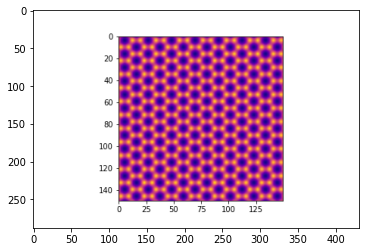

In [4]:
plt.imshow(plt.imread('stem_example.png'))

In [5]:
!pip install ase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import nglview as nv
w = nv.NGLWidget(nv.ASEStructure(a.ase_converter()))
#w.add_spacefill()
w

NGLWidget()

In [7]:
from google.colab import output
output.enable_custom_widget_manager()

In [8]:
from google.colab import output
output.disable_custom_widget_manager()